In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key


In [2]:
# Create a set of random latitude and longuitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 2000)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

721

In [5]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?"

#Create an endpoint URL for a city
appid = weather_api_key
units = "imperial"
url = url + "appid=" + appid +"&units=" + units
## city_url = url + "q=" + city + "&units="+ units + "&appid=" + appid

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    print(city_url)
    # Add 1 to the record count.
    record_count += 1    

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_description = city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                          "Description": city_description})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | belaya gora
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=belaya+gora
Processing Record 3 of Set 1 | tautira
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=tautira
Processing Record 4 of Set 1 | bacuit
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=bacuit
City not found. Skipping...
Processing Record 5 of Set 1 | avera
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=avera
Processing Record 6 of Set 1 | punta arenas
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594

City not found. Skipping...
Processing Record 3 of Set 2 | issia
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=issia
Processing Record 4 of Set 2 | de panne
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=de+panne
Processing Record 5 of Set 2 | palmer
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=palmer
Processing Record 6 of Set 2 | ostrovnoy
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=ostrovnoy
Processing Record 7 of Set 2 | kuching
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=kuching
Processing Record 8 of Set 2 | alofi
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=alofi
Processing Record 9 of Set 2 | thompson
https://api.openweathermap.org

Processing Record 6 of Set 3 | salalah
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=salalah
Processing Record 7 of Set 3 | mareeba
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=mareeba
Processing Record 8 of Set 3 | alice springs
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=alice+springs
Processing Record 9 of Set 3 | adrar
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=adrar
Processing Record 10 of Set 3 | yerbogachen
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=yerbogachen
Processing Record 11 of Set 3 | illoqqortoormiut
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 3 

Processing Record 8 of Set 4 | ngunguru
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=ngunguru
Processing Record 9 of Set 4 | nouadhibou
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=nouadhibou
Processing Record 10 of Set 4 | hithadhoo
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=hithadhoo
Processing Record 11 of Set 4 | gondanglegi
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=gondanglegi
Processing Record 12 of Set 4 | yulara
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=yulara
Processing Record 13 of Set 4 | mehran
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=mehran
Processing Record 14 of Set 4 | ballina
https://api.openweathermap.org/dat

Processing Record 11 of Set 5 | asau
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=asau
Processing Record 12 of Set 5 | saint-pierre
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=saint-pierre
Processing Record 13 of Set 5 | quatre cocos
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=quatre+cocos
Processing Record 14 of Set 5 | longonjo
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=longonjo
Processing Record 15 of Set 5 | bongandanga
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=bongandanga
Processing Record 16 of Set 5 | sur
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=sur
Processing Record 17 of Set 5 | ribeira brava
https://api.openweathermap

Processing Record 14 of Set 6 | mount gambier
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=mount+gambier
Processing Record 15 of Set 6 | dunda
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=dunda
Processing Record 16 of Set 6 | san patricio
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=san+patricio
Processing Record 17 of Set 6 | half moon bay
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=half+moon+bay
Processing Record 18 of Set 6 | launceston
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=launceston
Processing Record 19 of Set 6 | general roca
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=general+roca
Processing Record 20 of Set 6 | makuyuni
h

Processing Record 17 of Set 7 | nizwa
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=nizwa
Processing Record 18 of Set 7 | sarh
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=sarh
Processing Record 19 of Set 7 | kamenskoye
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=kamenskoye
City not found. Skipping...
Processing Record 20 of Set 7 | amuntai
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=amuntai
Processing Record 21 of Set 7 | cockburn town
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=cockburn+town
Processing Record 22 of Set 7 | sibolga
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=sibolga
Processing Record 23 of Set 7 | carutapera
https://a

Processing Record 20 of Set 8 | te anau
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=te+anau
Processing Record 21 of Set 8 | port macquarie
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=port+macquarie
Processing Record 22 of Set 8 | la roche-sur-yon
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=la+roche-sur-yon
Processing Record 23 of Set 8 | lalibela
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=lalibela
Processing Record 24 of Set 8 | eirunepe
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=eirunepe
Processing Record 25 of Set 8 | opuwo
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=opuwo
Processing Record 26 of Set 8 | domna
https://api.openwe

Processing Record 23 of Set 9 | juifang
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=juifang
City not found. Skipping...
Processing Record 24 of Set 9 | buala
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=buala
Processing Record 25 of Set 9 | hirara
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=hirara
Processing Record 26 of Set 9 | novaya malykla
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=novaya+malykla
Processing Record 27 of Set 9 | makat
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=makat
Processing Record 28 of Set 9 | imeni vorovskogo
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=imeni+vorovskogo
Processing Record 29 of Set 9 | oudtsh

City not found. Skipping...
Processing Record 26 of Set 10 | grand centre
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=grand+centre
City not found. Skipping...
Processing Record 27 of Set 10 | rorvik
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=rorvik
Processing Record 28 of Set 10 | hasaki
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=hasaki
Processing Record 29 of Set 10 | lillooet
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=lillooet
Processing Record 30 of Set 10 | dores do indaia
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=dores+do+indaia
Processing Record 31 of Set 10 | uvira
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=uvira
Proces

Processing Record 28 of Set 11 | zaysan
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=zaysan
Processing Record 29 of Set 11 | sainte-marie
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=sainte-marie
Processing Record 30 of Set 11 | vagur
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=vagur
Processing Record 31 of Set 11 | comodoro rivadavia
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=comodoro+rivadavia
Processing Record 32 of Set 11 | gillette
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=gillette
Processing Record 33 of Set 11 | kiruna
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=kiruna
Processing Record 34 of Set 11 | khasan
https://api.open

City not found. Skipping...
Processing Record 31 of Set 12 | narasannapeta
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=narasannapeta
Processing Record 32 of Set 12 | sao gabriel da cachoeira
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=sao+gabriel+da+cachoeira
Processing Record 33 of Set 12 | roma
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=roma
Processing Record 34 of Set 12 | kiama
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=kiama
Processing Record 35 of Set 12 | sturgeon falls
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=sturgeon+falls
Processing Record 36 of Set 12 | ixtapa
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=ixtapa
Proces

Processing Record 33 of Set 13 | saleaula
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=saleaula
City not found. Skipping...
Processing Record 34 of Set 13 | kyra
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=kyra
Processing Record 35 of Set 13 | intipuca
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=intipuca
Processing Record 36 of Set 13 | kulevcha
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=kulevcha
Processing Record 37 of Set 13 | the valley
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=the+valley
Processing Record 38 of Set 13 | ayagoz
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=ayagoz
Processing Record 39 of Set 13 | katesh
https://ap

Processing Record 35 of Set 14 | papillion
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=papillion
Processing Record 36 of Set 14 | wadi maliz
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=wadi+maliz
Processing Record 37 of Set 14 | batticaloa
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=batticaloa
Processing Record 38 of Set 14 | oliveira do hospital
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=oliveira+do+hospital
Processing Record 39 of Set 14 | nicoya
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=nicoya
Processing Record 40 of Set 14 | muros
https://api.openweathermap.org/data/2.5/weather?appid=e335e7ebdc316c2e2f0cfc594e2ae8ee&units=imperial&q=muros
Processing Record 41 of Set 14 | conde
https:/

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Description
0,Belaya Gora,68.5333,146.4167,-16.24,100,100,2.62,RU,2022-03-10 15:33:44,overcast clouds
1,Tautira,-17.7333,-149.1500,80.74,72,91,12.12,PF,2022-03-10 15:33:45,overcast clouds
2,Avera,33.1940,-82.5271,56.71,95,100,3.91,US,2022-03-10 15:33:45,light rain
3,Punta Arenas,-53.1500,-70.9167,50.11,53,0,8.05,CL,2022-03-10 15:33:46,clear sky
4,Liku,-0.7275,119.8922,77.45,91,77,3.18,ID,2022-03-10 15:33:46,broken clouds
5,Rikitea,-23.1203,-134.9692,78.42,69,79,6.87,PF,2022-03-10 15:33:47,broken clouds
6,High Level,58.5169,-117.1360,-11.09,77,0,3.44,CA,2022-03-10 15:33:47,clear sky
7,Quelimane,-17.8786,36.8883,85.95,70,40,17.27,MZ,2022-03-10 15:33:48,scattered clouds
8,Castro,-24.7911,-50.0119,75.69,80,53,5.91,BR,2022-03-10 15:33:48,broken clouds
9,Albany,42.6001,-73.9662,36.95,88,21,2.80,US,2022-03-10 15:32:07,few clouds


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Description"]
city_data_df = city_data_df[new_column_order]

In [12]:
# Create the output file
output_data_file = "Weather_Data/WeatherPy_Database.csv"

# Export data to CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

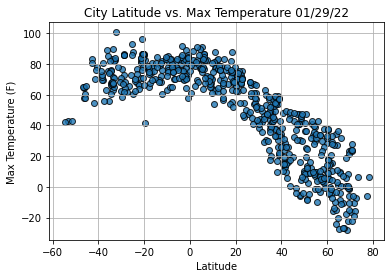

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

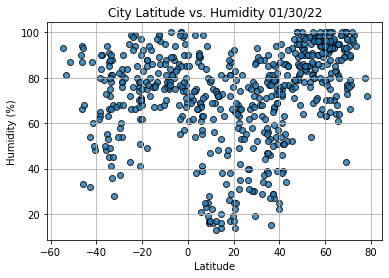

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

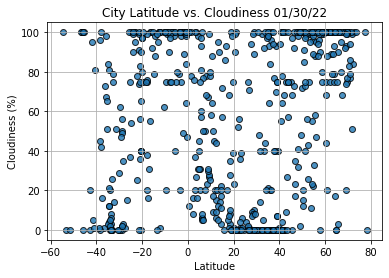

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

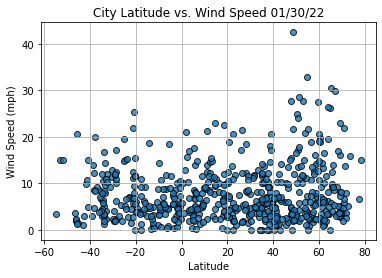

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [23]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

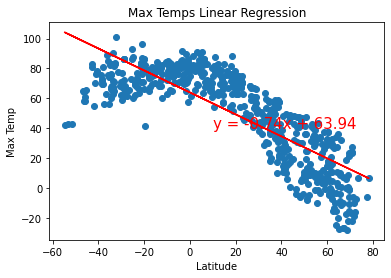

In [25]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("Max Temps Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()